In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
import os
src = '/content/drive/MyDrive/audioRavdess/'
dst = '/content/audio/'
if not os.path.isdir(dst):
  shutil.copytree(src, dst)

In [3]:
dir = list()

for i in range(1, 6):
  dir.append(os.path.join(dst, 'Actor_%s' % (i if i>9 else '0'+str(i))))

In [4]:
for i in dir:
  print(i, 'sebanyak', len(os.listdir(i)))

/content/audio/Actor_01 sebanyak 60
/content/audio/Actor_02 sebanyak 60
/content/audio/Actor_03 sebanyak 60
/content/audio/Actor_04 sebanyak 60
/content/audio/Actor_05 sebanyak 60


In [5]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

Ektraksi fitur

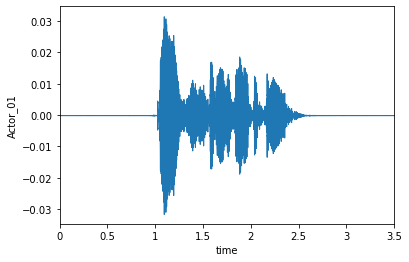

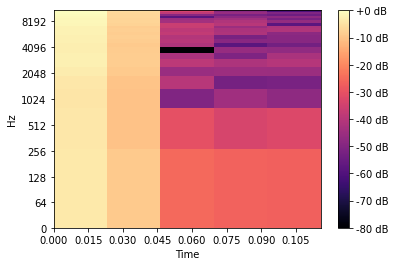

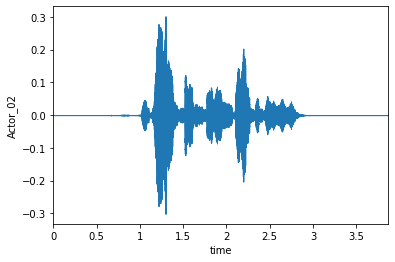

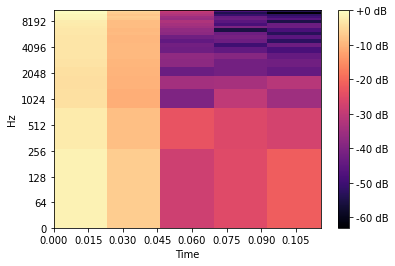

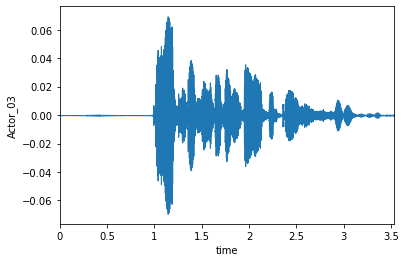

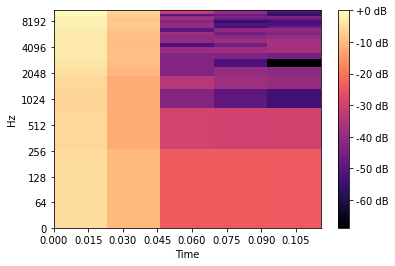

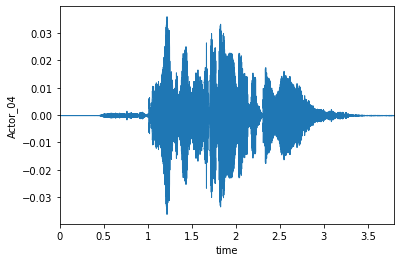

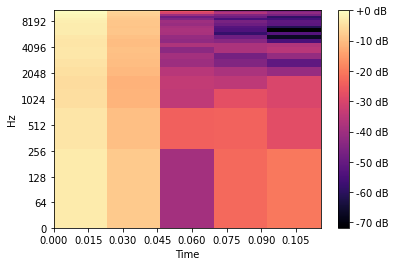

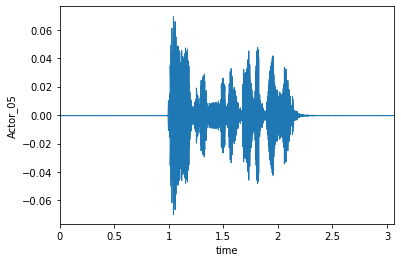

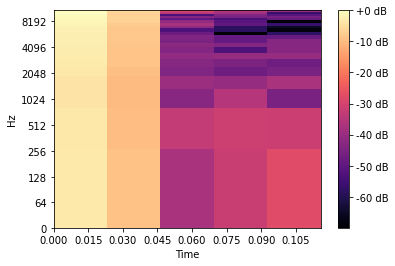

In [6]:
X_mfcc = list()
Y = list()
Fs = list()

for iDir in dir:
  for idx, data in enumerate(os.listdir(iDir)):
    data = os.path.join(iDir, data)
    x, fs = librosa.load(data, res_type='kaiser_fast')
    mfccs_f = np.mean(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=40).T, axis=0)
    X_mfcc.append(mfccs_f)
    Y.append(iDir[15:])
    Fs.append(fs)
    if idx == 0:
      #time
      plt.figure()
      librosa.display.waveplot(x, sr=fs)
      plt.xlabel('time')
      plt.ylabel(iDir[15:])

      #spectrogram
      fig, ax = plt.subplots(nrows=1, ncols=1)
      D = librosa.amplitude_to_db(np.abs(librosa.stft(mfccs_f, n_fft=40)), ref=np.max)
      img = librosa.display.specshow(D, y_axis='log', sr=fs, x_axis='time')
      fig.colorbar(img, format="%+2.f dB")

In [7]:
#fitur hasil ekstraksi
import pandas as pd
pd.DataFrame(X_mfcc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-738.170105,64.203064,-7.184046,17.684679,3.061616,1.608481,-4.927769,-4.574005,-13.751106,-1.281326,-3.294478,0.696218,-3.088076,-1.806215,-4.037118,0.828805,-5.458267,-5.527446,-1.201879,-0.137393,-6.398077,-2.076529,-2.887450,-4.643376,-1.500269,-1.054745,-2.645174,-0.446534,-2.811804,-0.287454,-2.035664,-4.123087,-1.252495,-1.968987,-2.573363,-1.440835,-0.254491,-2.717146,-3.634011,-3.410642
1,-672.501221,59.384579,-5.431530,14.982107,-4.445535,7.734422,-9.290539,-6.430641,-10.855005,1.731362,-2.751640,-1.399493,-2.779018,-4.339491,-3.022627,1.544688,-7.170328,-1.544381,-2.116369,-1.289900,-6.185515,-1.493386,-3.490373,-3.512704,-4.020205,-1.445436,-3.979394,-0.986205,-1.470044,-2.217826,-2.665489,-2.198300,-3.072881,-2.367354,-3.852197,-2.665658,-1.389509,-1.183371,-2.658273,-2.198195
2,-503.895874,46.516319,-5.204802,3.634700,-7.994336,1.957494,-17.072124,-12.035769,-11.504045,-2.664160,-9.096724,-3.757857,-9.150162,-4.733320,-6.719837,0.308393,-8.646714,-2.159988,-4.451622,-3.077097,-6.187653,-3.097657,-3.816869,-3.805601,-4.331494,-1.828928,-3.806374,-0.731557,-0.000963,1.330716,1.240385,0.871198,-0.147335,-0.468855,0.425717,2.372419,0.957126,-0.369405,-0.379200,-1.097025
3,-701.305725,72.316086,-5.354832,16.675140,2.270264,5.004624,-8.745189,-2.092109,-11.578034,-1.534801,-0.342436,1.229214,-3.475580,-2.633218,-1.840330,0.563153,-5.178667,-1.328832,-1.409830,0.184255,-6.640454,0.181262,-2.104096,-3.878146,-2.074743,-1.953270,-4.096697,-0.435066,-2.127627,-1.300365,-3.309166,-3.141019,-3.548249,-3.604880,-4.542142,-1.873123,-1.388899,-2.991814,-3.720480,-4.148329
4,-556.444580,46.580143,-9.799376,11.803111,-4.285303,0.831665,-10.628536,-3.813435,-14.978992,-3.431358,-4.225200,-3.948753,-4.351576,-1.184321,-8.557418,0.889421,-9.526573,-3.923472,-3.720180,-3.649523,-6.125023,-2.501707,-4.363320,-5.488499,-2.011220,-0.475244,-2.401266,3.006914,-0.009023,1.259607,0.303994,0.177693,0.147959,-2.010421,-1.908629,-0.606931,0.131426,-1.234889,-0.894085,-1.657767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-762.358948,70.381393,11.812061,29.563679,-1.935054,7.328944,-3.939920,3.668447,-2.516210,12.275091,-0.578997,7.758386,-5.408720,0.609834,1.993429,1.743670,-4.196713,5.774626,-2.915698,1.168473,-0.216897,-0.396357,-2.456525,1.304937,-2.429923,1.557044,-1.330052,2.154503,-0.139674,-1.929027,-1.044592,0.280808,-1.349485,0.857885,1.041358,-0.209019,-1.825370,-2.001792,-1.956644,-0.268024
296,-665.846558,53.264145,6.728336,15.843981,-1.979095,3.598664,-1.991896,-1.742128,-5.785836,3.761963,1.137060,3.221385,-2.711462,1.459521,0.033739,2.359070,-2.873620,1.444329,-1.468077,2.890454,-2.657867,-0.216360,-2.730783,-0.745626,-2.615103,4.217458,-1.748856,0.784188,1.689307,1.271166,0.215427,-0.208195,0.438948,-0.012765,0.711326,0.049581,-0.754100,-2.325426,-1.458775,0.775835
297,-474.273285,38.499496,-19.919891,2.626010,-7.388698,-3.249795,-16.847992,-4.740724,-10.990626,-4.151128,-3.789514,-0.155697,-8.111115,0.859952,-6.359019,2.329512,-4.869619,2.438199,1.666292,5.682201,1.657058,4.453084,2.778854,5.800508,2.477232,7.907173,3.386551,4.411071,3.796270,4.903873,5.142568,3.778697,2.995462,3.988068,3.391793,2.055112,2.340337,1.283066,1.798162,2.460563
298,-751.204956,83.662888,9.927412,29.103735,3.160966,9.746264,-3.374534,0.998163,-5.962651,12.315254,-0.887404,6.993100,-4.993157,4.724145,-1.005379,4.887061,-3.879100,5.350089,-0.428313,2.996400,-3.357887,1.414352,-4.347013,1.681925,-2.881944,3.051017,-0.440911,-0.034950,1.883372,0.001809,1.858918,-1.192885,0.035687,0.100292,1.304062,0.212549,-1.201762,-1.195264,-2.214074,0.374938


In [8]:
#label
pd.DataFrame(Y)

,0
0,Actor_01
1,Actor_01
2,Actor_01
3,Actor_01
4,Actor_01
...,...
295,Actor_05
296,Actor_05
297,Actor_05
298,Actor_05


Split menjadi data train dan test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mfcc, Y, test_size=0.2, random_state=44)

In [10]:
print('Data latih sebanyak', len(X_train), 'Data tes sebanyak', len(X_test))

Data latih sebanyak 240 Data tes sebanyak 60


Scaling fitur

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.435411,0.537516,0.475673,0.415903,0.528639,0.554351,0.590598,0.424349,0.490610,0.507816,0.349052,0.413615,0.411108,0.324467,0.382507,0.379160,0.374821,0.287645,0.402528,0.356404,0.285707,0.377705,0.352373,0.338680,0.438660,0.336341,0.357326,0.301914,0.375540,0.395268,0.464192,0.394897,0.418004,0.408735,0.421373,0.435609,0.398271,0.454781,0.453884,0.467966
std,0.212790,0.195961,0.207096,0.192032,0.213188,0.190902,0.194510,0.230863,0.188697,0.129516,0.196075,0.197166,0.176972,0.121017,0.178957,0.169763,0.125592,0.144389,0.200382,0.164080,0.148775,0.167109,0.142977,0.171201,0.185123,0.144222,0.188594,0.157308,0.196468,0.217181,0.191351,0.207931,0.177582,0.205841,0.211691,0.187325,0.143185,0.196841,0.204195,0.187160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268802,0.387461,0.332297,0.288641,0.359237,0.413856,0.473343,0.226266,0.382607,0.450584,0.186687,0.276654,0.281682,0.243896,0.256504,0.247898,0.310729,0.189052,0.242821,0.234135,0.175188,0.273716,0.256744,0.214550,0.322967,0.237775,0.219604,0.197861,0.224853,0.228597,0.322539,0.241725,0.295906,0.261042,0.248729,0.305035,0.312279,0.325861,0.310080,0.351703
50%,0.426220,0.548849,0.460598,0.401468,0.504012,0.568800,0.601374,0.417163,0.482955,0.504449,0.336592,0.419228,0.395823,0.318227,0.352040,0.383661,0.369477,0.264344,0.407913,0.349207,0.269651,0.359761,0.343639,0.329039,0.416680,0.317018,0.345309,0.273435,0.377361,0.361531,0.440788,0.379620,0.410058,0.401702,0.438298,0.436575,0.383558,0.465399,0.466034,0.473100
75%,0.553412,0.677023,0.622593,0.548901,0.715573,0.687060,0.722211,0.599719,0.596901,0.561331,0.505642,0.517662,0.552216,0.378887,0.503032,0.477193,0.429159,0.358488,0.523845,0.461050,0.369523,0.470529,0.420948,0.442172,0.532411,0.413302,0.469881,0.390441,0.504202,0.556783,0.577852,0.524290,0.509985,0.551239,0.567327,0.538608,0.487072,0.592255,0.593759,0.581613
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Akurasi')

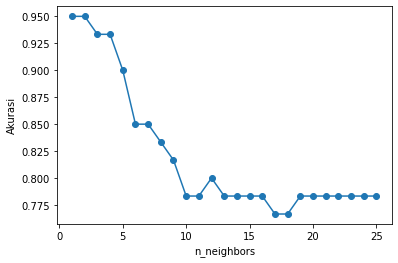

In [ ]:
plt.plot(k_range, scores_list, '-o')
plt.xlabel('n_neighbors')
plt.ylabel('Akurasi')

In [ ]:
scores

{1: 0.95,
 2: 0.95,
 3: 0.9333333333333333,
 4: 0.9333333333333333,
 5: 0.9,
 6: 0.85,
 7: 0.85,
 8: 0.8333333333333334,
 9: 0.8166666666666667,
 10: 0.7833333333333333,
 11: 0.7833333333333333,
 12: 0.8,
 13: 0.7833333333333333,
 14: 0.7833333333333333,
 15: 0.7833333333333333,
 16: 0.7833333333333333,
 17: 0.7666666666666667,
 18: 0.7666666666666667,
 19: 0.7833333333333333,
 20: 0.7833333333333333,
 21: 0.7833333333333333,
 22: 0.7833333333333333,
 23: 0.7833333333333333,
 24: 0.7833333333333333,
 25: 0.7833333333333333}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy= ', metrics.accuracy_score(y_test, y_pred))

Accuracy=  0.9333333333333333


In [ ]:
pd.DataFrame({'Prediksi': y_pred, 'Asli': y_test}, columns=['Prediksi', 'Asli'])

,Prediksi,Asli
0,Actor_01,Actor_01
1,Actor_03,Actor_03
2,Actor_05,Actor_05
3,Actor_03,Actor_03
4,Actor_02,Actor_02
5,Actor_01,Actor_01
6,Actor_05,Actor_05
7,Actor_03,Actor_03
8,Actor_03,Actor_03
9,Actor_01,Actor_01


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(
    kernel = 'rbf',
    C = 1,
    gamma = 0.01
)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.7166666666666667


In [ ]:
pd.DataFrame({'Prediksi': y_pred, 'Asli': y_test}, columns=['Prediksi', 'Asli'])

,Prediksi,Asli
0,Actor_05,Actor_01
1,Actor_02,Actor_03
2,Actor_05,Actor_05
3,Actor_04,Actor_03
4,Actor_04,Actor_02
5,Actor_01,Actor_01
6,Actor_05,Actor_05
7,Actor_05,Actor_03
8,Actor_03,Actor_03
9,Actor_02,Actor_01


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
y_pred = grid.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9833333333333333


In [ ]:
pd.DataFrame({'Prediksi': y_pred, 'Asli': y_test}, columns=['Prediksi', 'Asli'])

,Prediksi,Asli
0,Actor_01,Actor_01
1,Actor_03,Actor_03
2,Actor_05,Actor_05
3,Actor_03,Actor_03
4,Actor_02,Actor_02
5,Actor_01,Actor_01
6,Actor_05,Actor_05
7,Actor_03,Actor_03
8,Actor_03,Actor_03
9,Actor_01,Actor_01
